In [1]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import pandas_datareader
import datetime

import pandas_datareader.data as web

In [10]:
#creating a start and an end dates:
start = datetime.datetime(2016,1,1)
end = datetime.datetime.today()

In [11]:
#Microsoft
soft = web.DataReader("MSFT", "yahoo", start, end)
soft.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,56.189999,55.419998,56.040001,55.480000,27334100.0,50.510929
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,49.891834
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,50.119446
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.209011
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,47.497398


In [12]:
#Apple
apl = web.DataReader('AAPL', 'yahoo', start, end)
apl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,26.757500,26.205000,26.752501,26.315001,163649200.0,24.343718
2016-01-04,26.342501,25.500000,25.652500,26.337500,270597600.0,24.364536
2016-01-05,26.462500,25.602501,26.437500,25.677500,223164000.0,23.753977
2016-01-06,25.592501,24.967501,25.139999,25.174999,273829600.0,23.289116
2016-01-07,25.032499,24.107500,24.670000,24.112499,324377600.0,22.306208


In [13]:
#Google
gog = web.DataReader('GOOG', 'yahoo', start, end)
gog.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-12-31,769.500000,758.340027,769.500000,758.880005,1500900,758.880005
2016-01-04,744.059998,731.257996,743.000000,741.840027,3272800,741.840027
2016-01-05,752.000000,738.640015,746.450012,742.580017,1950700,742.580017
2016-01-06,747.179993,728.919983,730.000000,743.619995,1947000,743.619995
2016-01-07,738.500000,719.059998,730.309998,726.390015,2963700,726.390015


Now visualizing the graph. So first we are going to plot the graph of open price of all the three stocks in a same graph.

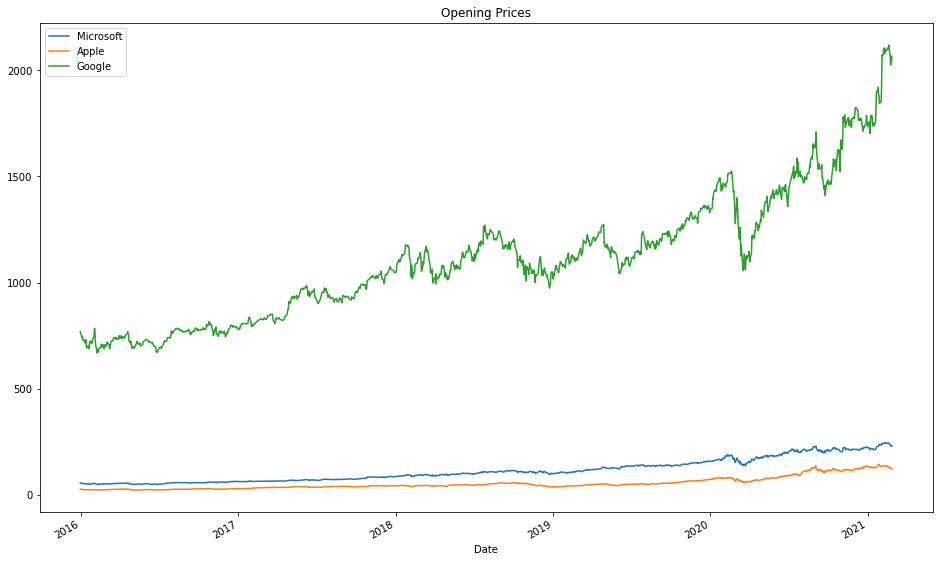

In [14]:
soft['Open'].plot(label = 'Microsoft', figsize = (16,10), title = 'Opening Prices')
apl['Open'].plot(label = 'Apple')
gog['Open'].plot(label = 'Google')
plt.legend(loc = 'best');

Now let's plot the Volume of each stock that was traded every day

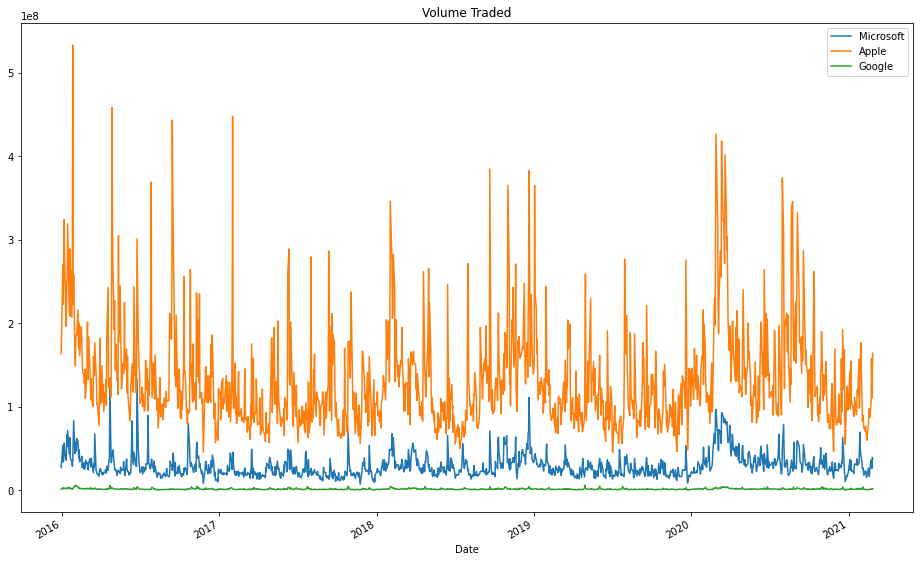

In [15]:
soft['Volume'].plot(label = 'Microsoft', figsize = (16,10), title = 'Volume Traded')
apl['Volume'].plot(label = 'Apple')
gog['Volume'].plot(label = 'Google')
plt.legend();

Lets also see the closing price of each stocks

So From the above graph of volumes traded , we can observe that the most actively traded stock in terms of volume was Apple and its clearly visible from the graph as we can see multiple no of high spikes in the Apple graph. Then microsoft was traded to some extent but the least traded was Google stock as we can see an almost straight line with just little spikes.

Another useful visual would be a visual of the total volume that was traded.

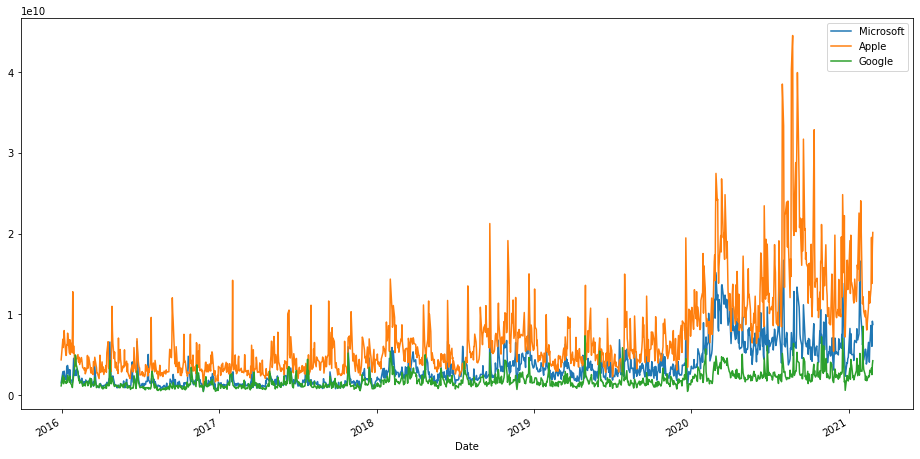

In [16]:
soft['Total Traded'] = soft['Open']*soft['Volume']
apl['Total Traded'] = apl['Open']*apl['Volume']
gog['Total Traded'] = gog['Open']*gog['Volume']

soft['Total Traded'].plot(figsize = (16,8), label = 'Microsoft')
apl['Total Traded'].plot(figsize = (16,8), label = 'Apple')
gog['Total Traded'].plot(figsize = (16,8), label = 'Google')
plt.legend(loc = 'best');

To make it more precise, I would use average prices instead of the price at the opening.

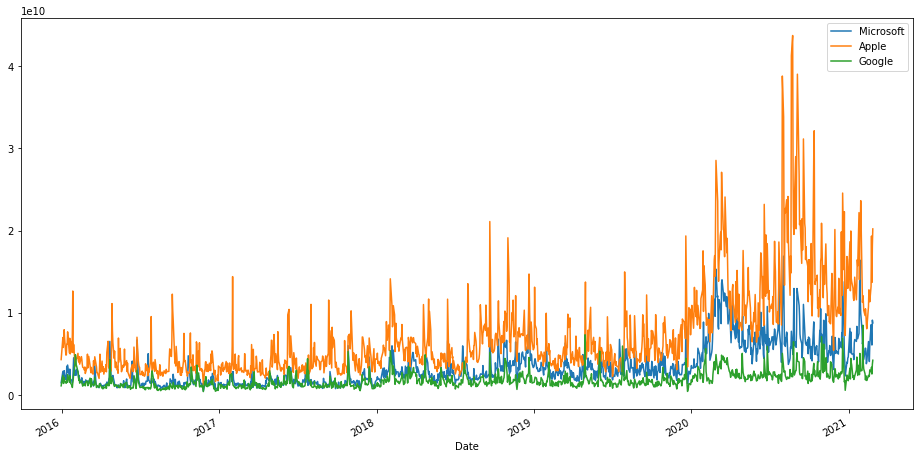

In [17]:
soft['Avg'] = soft[['High', 'Low']].mean(axis=1)
apl['Avg'] = apl[['High', 'Low']].mean(axis=1)
gog['Avg'] = gog[['High', 'Low']].mean(axis=1)

soft['Total Traded New'] = soft['Avg']*soft['Volume']
apl['Total Traded New'] = apl['Avg']*apl['Volume']
gog['Total Traded New'] = gog['Avg']*gog['Volume']

soft['Total Traded New'].plot(figsize = (16,8), label = 'Microsoft')
apl['Total Traded New'].plot(figsize = (16,8), label = 'Apple')
gog['Total Traded New'].plot(figsize = (16,8), label = 'Google')
plt.legend(loc = 'best');

Now we can compare Total Traded vs Total Traded New.

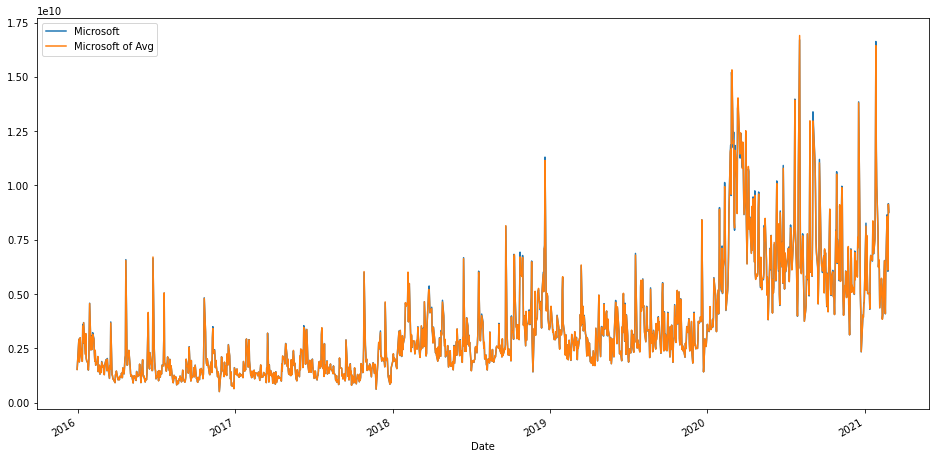

In [18]:
soft['Total Traded'].plot(figsize = (16,8), label = 'Microsoft')
soft['Total Traded New'].plot(figsize = (16,8), label = 'Microsoft of Avg')
plt.legend(loc = 'best');

Moving Average (MA) is widely used in technical analysis to smooth out the price by taking out the "noise" from random short-term price changes. Since it is based on historical prices, it is a lagging or trend-following indicator.

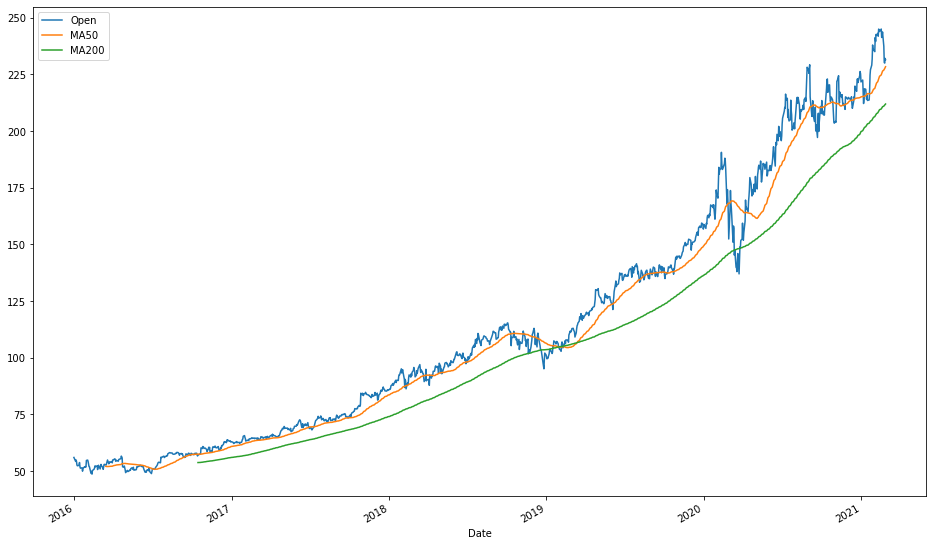

In [19]:
soft['MA50'] = soft['Open'].rolling(50).mean()
soft['MA200'] = soft['Open'].rolling(200).mean()
soft[['Open','MA50','MA200']].plot(figsize = (16,10))

apl['MA50'] = apl['Open'].rolling(50).mean()
apl['MA200'] = apl['Open'].rolling(200).mean()

gog['MA50'] = gog['Open'].rolling(50).mean()
gog['MA200'] = gog['Open'].rolling(200).mean()

Basic Analysis

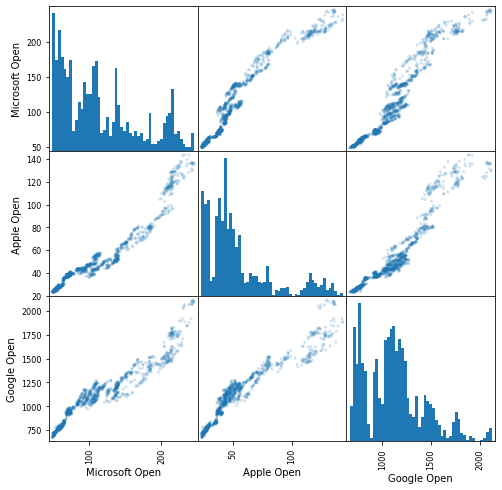

In [20]:
from pandas.plotting import scatter_matrix 

ret_comp = pd.concat([soft['Open'],apl['Open'],gog['Open']], axis = 1)
ret_comp.columns = ['Microsoft Open', 'Apple Open', 'Google Open']
scatter_matrix(ret_comp, figsize =(8,8), alpha = 0.2, hist_kwds={'bins':50});


In [17]:
pip install mpl-finance

Note: you may need to restart the kernel to use updated packages.


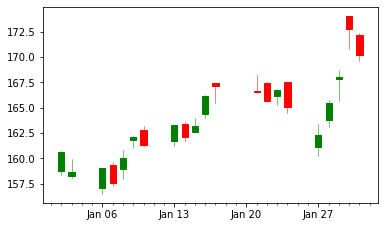

In [21]:
from mpl_finance import candlestick_ohlc
from matplotlib.dates import DateFormatter,date2num,WeekdayLocator, DayLocator, MONDAY

soft_jan19 = soft.loc['2020-01'].reset_index()
soft_jan19['date_ax'] = soft_jan19['Date'].apply(lambda date: date2num(date))

list_of_col = ['date_ax', 'Open', 'High', 'Low', 'Close']
soft_values = [tuple(vals) for vals in soft_jan19[list_of_col].values]

mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
alldays = DayLocator()              # minor ticks on the days
weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
dayFormatter = DateFormatter('%d')      # e.g., 12

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, soft_values, width=0.6, colorup='g',colordown='r');

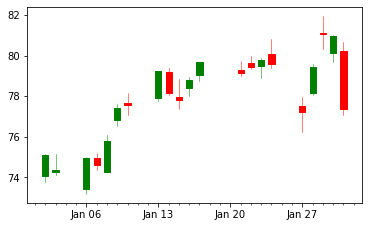

In [22]:
apl_jan19 = apl.loc['2020-01'].reset_index()
apl_jan19['date_ax'] = apl_jan19['Date'].apply(lambda date: date2num(date))

list_of_col = ['date_ax', 'Open', 'High', 'Low', 'Close']
apl_values = [tuple(vals) for vals in apl_jan19[list_of_col].values]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, apl_values, width=0.6, colorup='g',colordown='r');

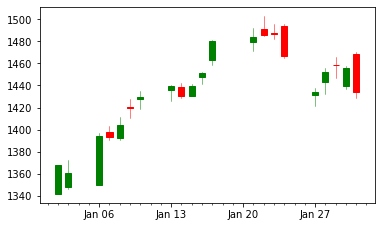

In [24]:
gog_jan19 = gog.loc['2020-01'].reset_index()
gog_jan19['date_ax'] = gog_jan19['Date'].apply(lambda date: date2num(date))

list_of_col = ['date_ax', 'Open', 'High', 'Low', 'Close']
gog_values = [tuple(vals) for vals in gog_jan19[list_of_col].values]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.2)
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_minor_locator(alldays)
ax.xaxis.set_major_formatter(weekFormatter)

candlestick_ohlc(ax, gog_values, width=0.6, colorup='g',colordown='r');

By looking at a daily percentage change, it can be concluded stock's volatility and how risky it is. The formula is simple: more volatility = more risk.

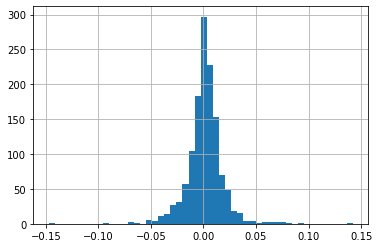

In [25]:
soft['Returns'] = soft['Close'].pct_change(1)
apl['Returns'] = apl['Close'].pct_change(1)
gog['Returns'] = gog['Close'].pct_change(1)
soft['Returns'].hist(bins = 50);

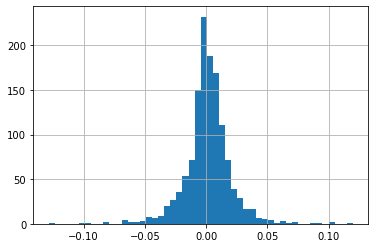

In [26]:
apl['Returns'].hist(bins = 50);

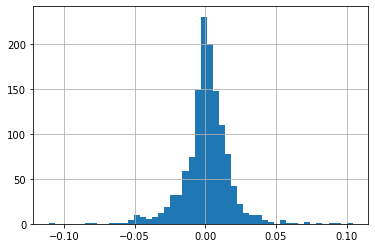

In [27]:
gog['Returns'].hist(bins = 50);

Since the histograms have a 'bell'-shaped form and are symmetric around zero, the data is normally distributed.

By plotting all 3 on the graph, let us compare them back to back.

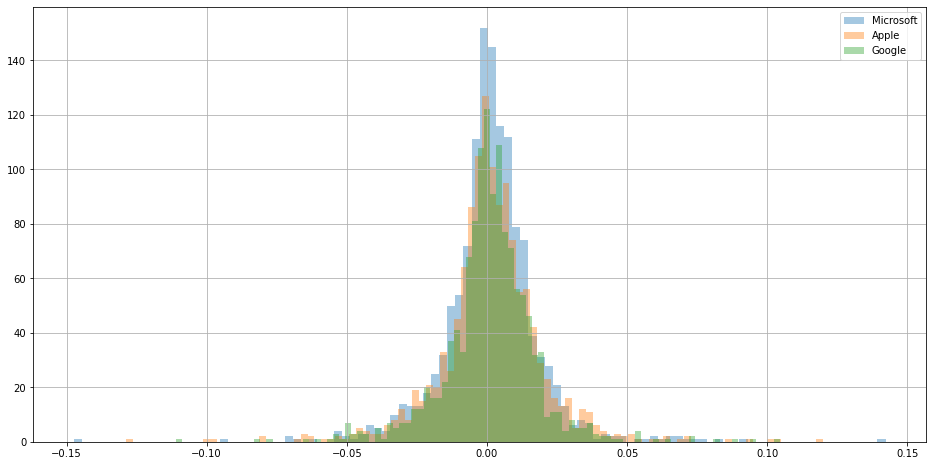

In [28]:
soft['Returns'].hist(bins = 100, figsize=(16,8), label = 'Microsoft', alpha=0.4)
apl['Returns'].hist(bins = 100, figsize=(16,8), label = 'Apple', alpha=0.4)
gog['Returns'].hist(bins = 100, figsize=(16,8), label = 'Google', alpha=0.4)
plt.legend();

Kernal Density Estimate type of graph

This graph is used to visualize the Probability Density of a time series. The higher the pick = less volatile the time series.

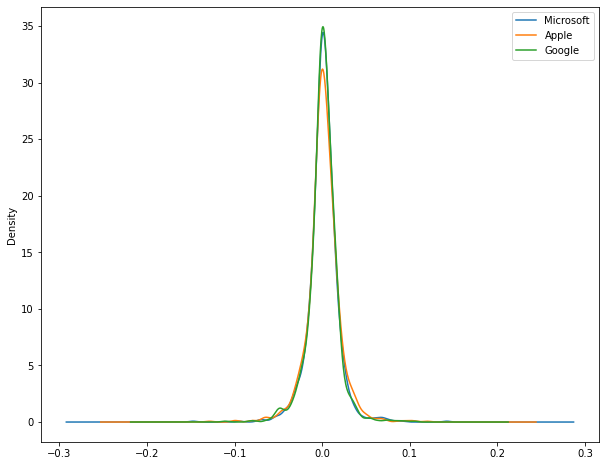

In [29]:
soft['Returns'].plot(kind='kde', label = 'Microsoft', figsize=(10,8))
apl['Returns'].plot(kind='kde', label = 'Apple',figsize=(10,8))
gog['Returns'].plot(kind='kde', label = 'Google', figsize=(10,8))
plt.legend();

Scatterplot

To see the correlation of the daily returns scatterplots can used.

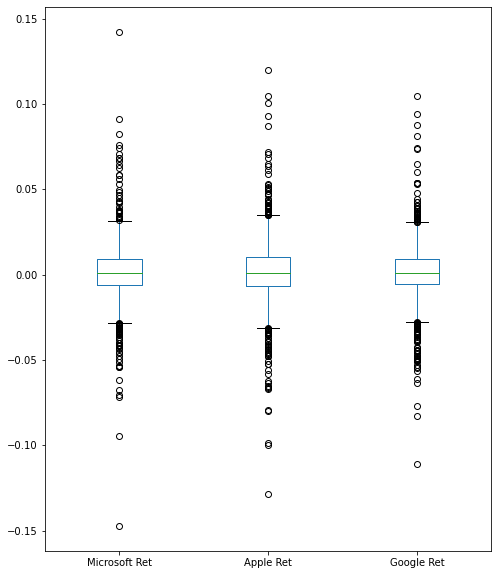

In [31]:
box_df = pd.concat([soft['Returns'], apl['Returns'], gog['Returns']], axis = 1)
box_df.columns = ['Microsoft Ret', 'Apple Ret', 'Google Ret']
box_df.plot(kind='box', figsize = (8,10));

Scatterplot

To see the correlation of the daily returns scatterplots can used.

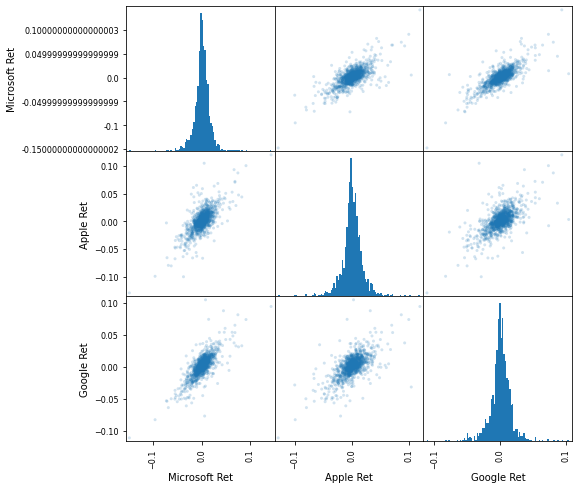

In [33]:
scatter_matrix(box_df, figsize=(8,8), alpha = 0.2, hist_kwds={'bins':100});